# Hello Homes Expansion Project: Builders Edition 

**Authors:** Monique Hercules 
***

## Overview


Our stakeholder is a local real estate agency that help homeowners buy/sell homes. After years in the industry they have decided to expand to include the building and flipping of homes as well to better meet there consumer needs and increase revenue .

The dataset in use will be from King County of Washington State. It will feature various aspects of a home like sqft living, year built and the condition of the home. 

## Business Problem

Hello Homes would like to find out what types of homes they would need to build based off of there past sales to meet there consumers needs and increase revenue. They are targeting the most popular price ranges, sqft living, and accommodation preferences like bathrooms,bedrooms and number of floors. 

Today we will provide evidential advice on various aspects of a home to fit the builders needs. By targeting this information the real estate agency will know exactly what types of homes to build for their clients.With the use of multiple linear regression we will be able to accurately  see the relationship between the various attributes of a home and and how they reflect upon the homes worth. 



## Data Understanding 

Import revelant libraries, and inspect data 

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline

df = pd.read_csv("data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [59]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Verifying Assumptions for Linear Regression

### Checking for Linearity relation and removing outliers

Created a function which uses interquartile range box plot to statistically determine the outliers for each of the numerical variables. Once we determine these outliers we will be able to remove them so that they will not affect our model.

In [61]:
def plot_outliers(name):
    arr1 = df[name].to_numpy()

    plt.boxplot(arr1)
    fig = plt.figure(figsize=(10, 7))
    plt.show()

    # finding the 1st quartile
    q1 = np.quantile(arr1, 0.25)

    # finding the 3rd quartile
    q3 = np.quantile(arr1, 0.75)
    med = np.median(arr1)

    # finding the iqr region
    iqr = q3 - q1

    # finding upper and lower whiskers
    upper_bound = q3 + (1.5 * iqr)
    lower_bound = q1 - (1.5 * iqr)
    print('Feature Name: {}\nIQR: {}\nUpper Bound: {}\nLower Bound:{}\n'.format(
        name, iqr, upper_bound, lower_bound))

    outliers = arr1[(arr1 <= lower_bound) | (arr1 >= upper_bound)]
    return (upper_bound, lower_bound)

Price vs Bedrooms 

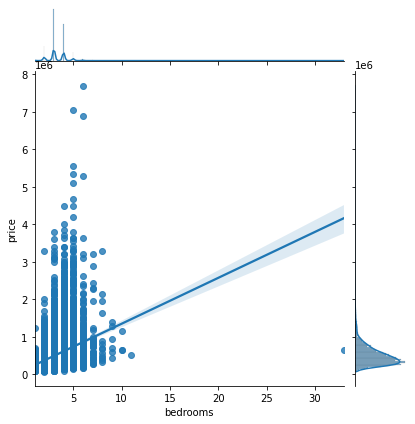

In [62]:
sns.jointplot(x='bedrooms', y='price', data=df, kind='reg')
#categorical but will be treating as continous
#Without Removed outliers
#Will be using this feature 

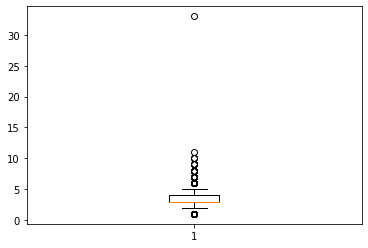

<Figure size 720x504 with 0 Axes>

Feature Name: bedrooms
IQR: 1.0
Upper Bound: 5.5
Lower Bound:1.5



In [63]:
upper, lower = plot_outliers('bedrooms')
#IQR boxplot, determining the upper and lower bound 

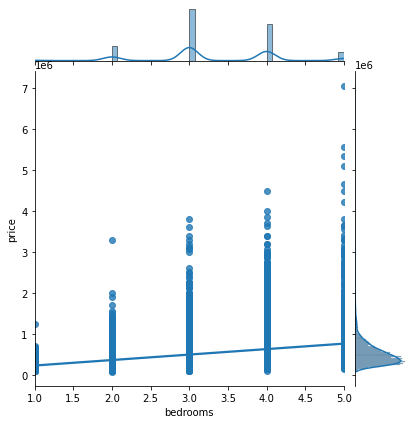

In [64]:
df = df.loc[df['bedrooms'] < upper]
sns.jointplot(x='bedrooms', y='price', data=df, kind='reg')
#Removed Outliers above 5.5, based on the upper bound of the IQR Boxplot 
#Will use this feature 

Price vs Square foot above

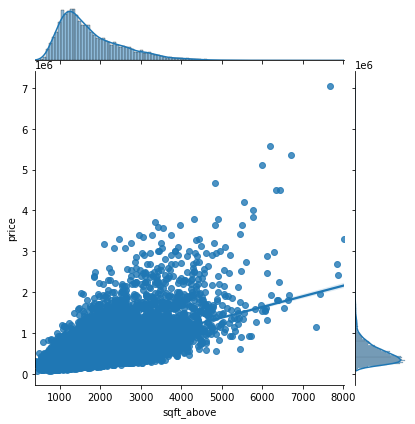

In [65]:
sns.jointplot(x='sqft_above', y='price', data=df, kind='reg')
#Will not be using this feature 

Price vs Square foot living 

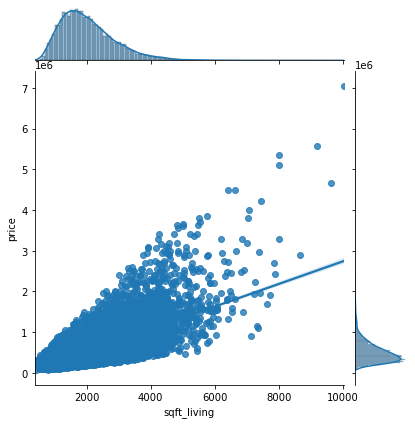

In [66]:
sns.jointplot(x='sqft_living', y='price', data=df, kind='reg')
#Linear Relation
#Without removed outlier

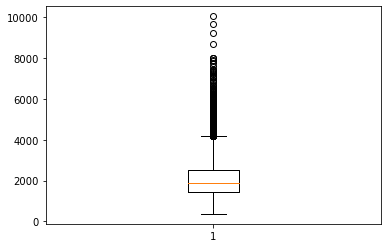

<Figure size 720x504 with 0 Axes>

Feature Name: sqft_living
IQR: 1100.0
Upper Bound: 4170.0
Lower Bound:-230.0



In [67]:
upper, lower = plot_outliers('sqft_living')
#IQR boxplot, determining the upper and lower bound 

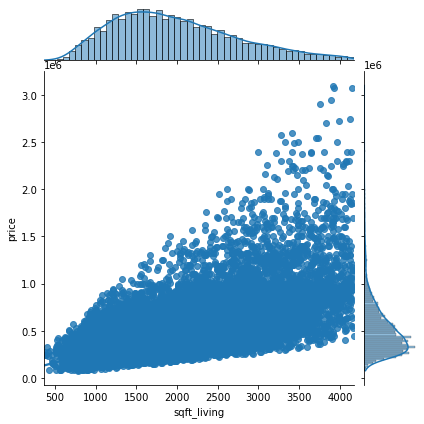

In [68]:
df = df.loc[df['sqft_living'] < upper]
sns.jointplot(x='sqft_living', y='price', data=df, kind='reg')
#With removed outliers,Removing outliers above 4170 based on IQR upper bound  
#Will use this feature 

Price vs Square foot lot 

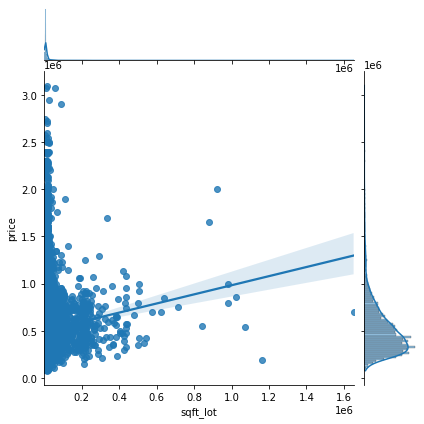

In [69]:
sns.jointplot(x='sqft_lot', y='price', data=df, kind='reg')
#no linear relation, will not be used

Price vs Floors 

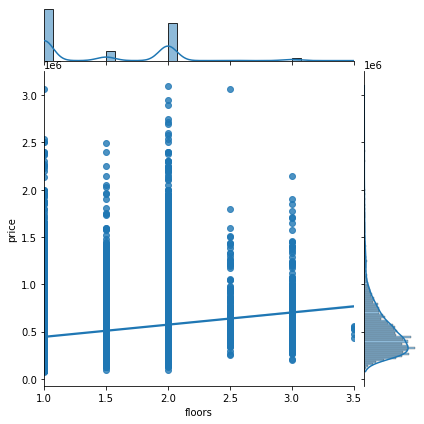

In [70]:
sns.jointplot(x='floors', y='price', data=df, kind='reg')
#categorical but will be treating as continous
#without removed outliers 
#Will use this feature 

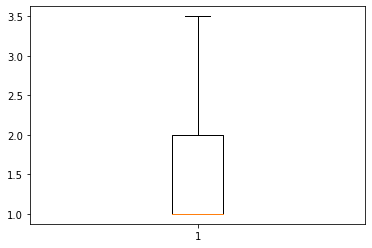

<Figure size 720x504 with 0 Axes>

Feature Name: floors
IQR: 1.0
Upper Bound: 3.5
Lower Bound:-0.5



In [71]:
upper, lower = plot_outliers('floors')
#IQR boxplot, determining the upper and lower bound 

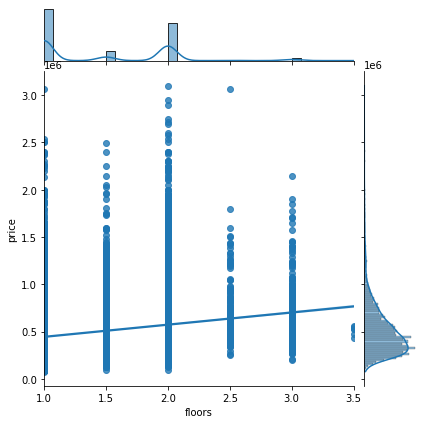

In [72]:
df = df.loc[df['floors'] <= upper]
sns.jointplot(x='floors', y='price', data=df, kind='reg')
#Removed outliers above 3.5 based on the IQR upper bound 
#Will use this feature 

Price vs Bathrooms 

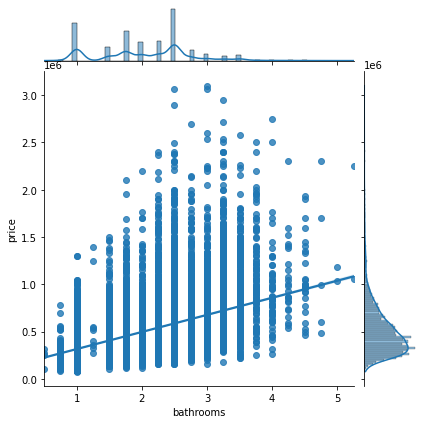

In [73]:
sns.jointplot(x='bathrooms', y='price', data=df, kind='reg')
#categorical but will be treating as continous
#Without Removed outlier
#Will use this feature 

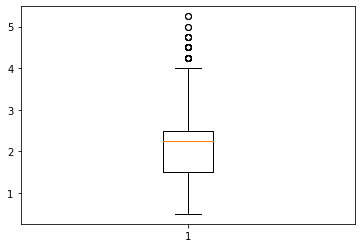

<Figure size 720x504 with 0 Axes>

Feature Name: bathrooms
IQR: 1.0
Upper Bound: 4.0
Lower Bound:0.0



In [74]:
upper, lower = plot_outliers('bathrooms')
#IQR boxplot, determining the upper and lower bound 

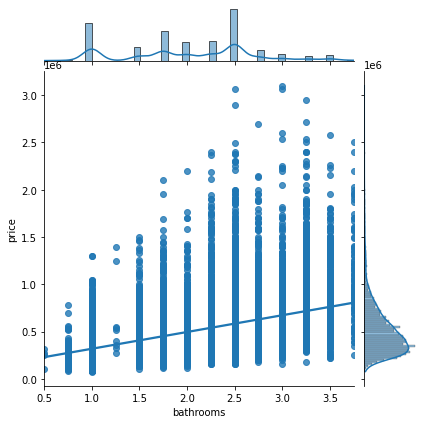

In [75]:
df = df.loc[df['bathrooms'] < upper]
sns.jointplot(x='bathrooms', y='price', data=df, kind='reg')
#Removed outliers above 4.0 based on the IQR upper bound 
#Will be used 

Price vs Year Built 

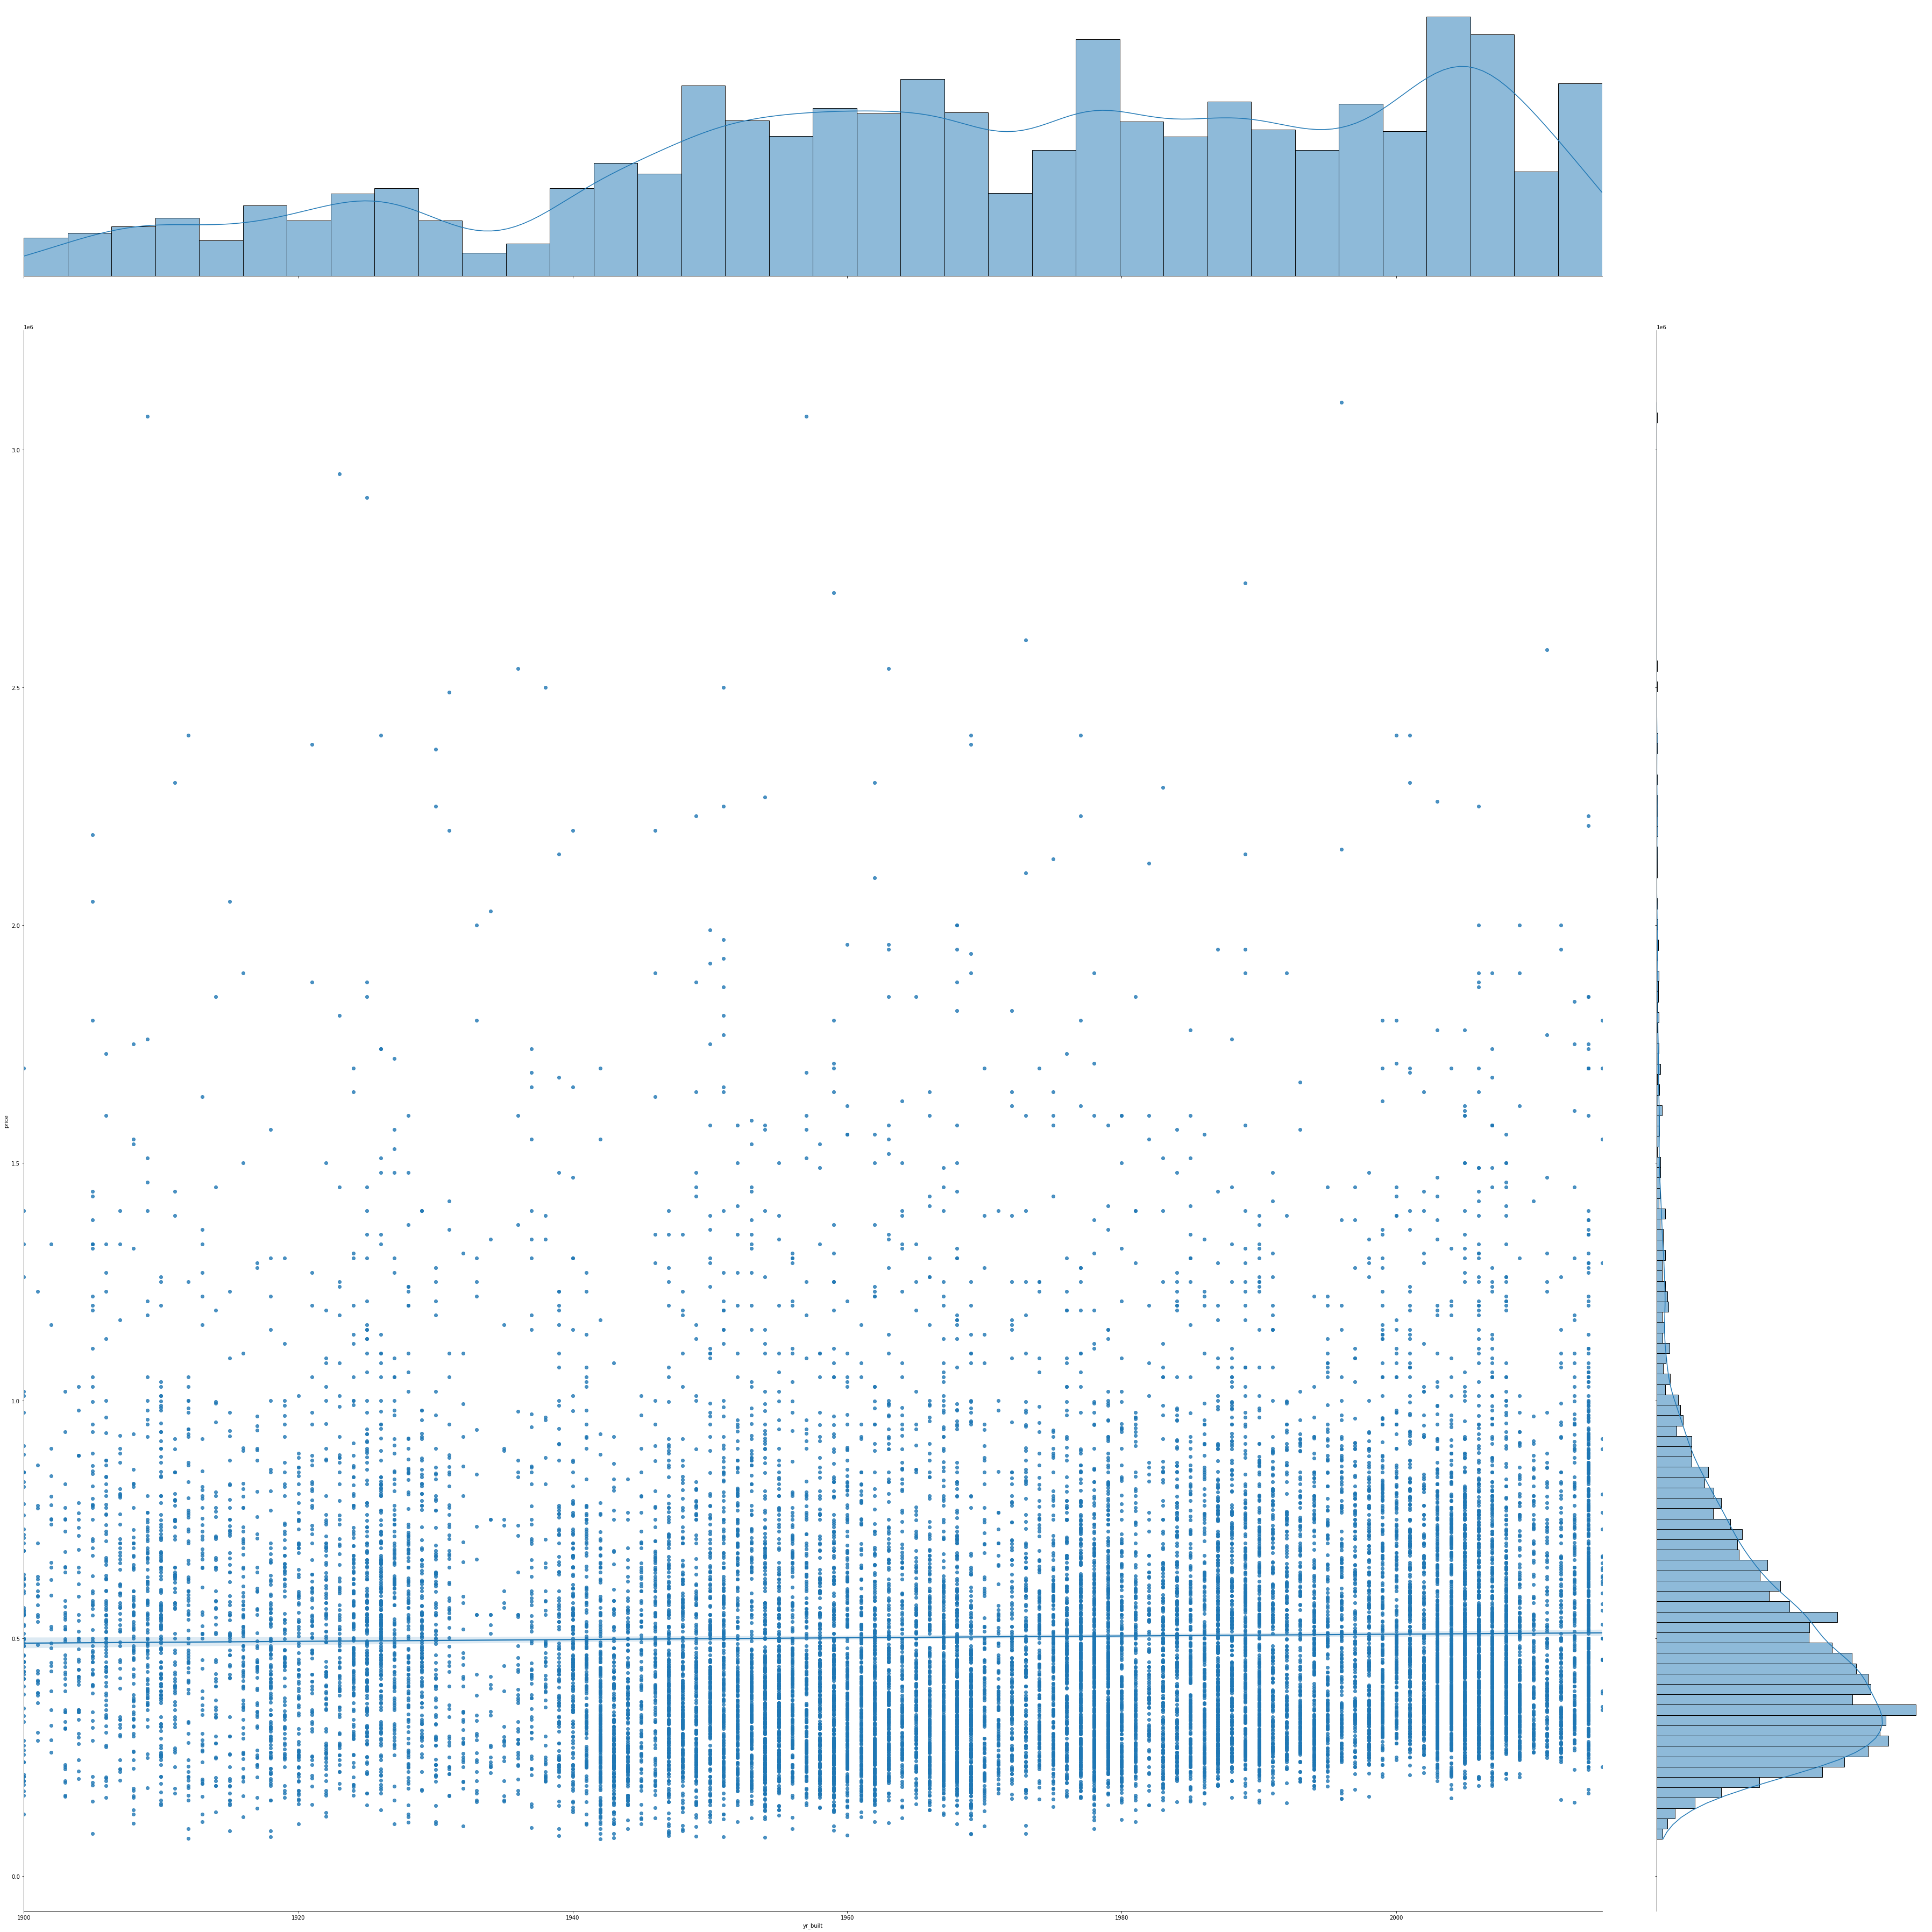

In [76]:
sns.jointplot(x='yr_built', y='price', data=df, kind='reg', height=50)
#No Linear relation, will not be used

Price vs Zipcode

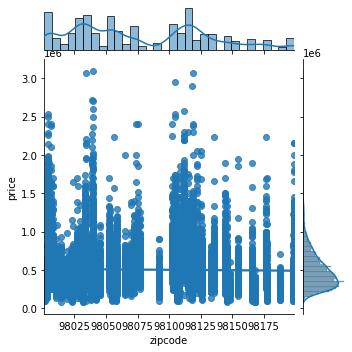

In [77]:
sns.jointplot(x='zipcode', y='price', data=df, kind='reg', height=5)
#Will not use this feature 
#Categorical

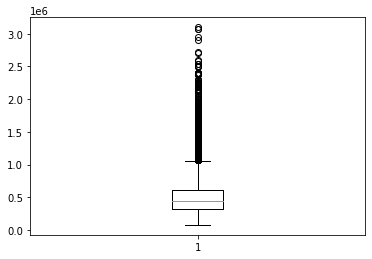

<Figure size 720x504 with 0 Axes>

Feature Name: price
IQR: 299000.0
Upper Bound: 1063500.0
Lower Bound:-132500.0



In [78]:
upper, lower = plot_outliers('price')
#IQR boxplot, determining the upper and lower bound 

In [79]:
df = df.loc[df['price'] < upper]
#Removed outliers above 1063500 based on the IQR upper bound 
#Will be used 

### Normality

#### Checking for normality 

Using histogram to check distribution of all relevant numerical columns 

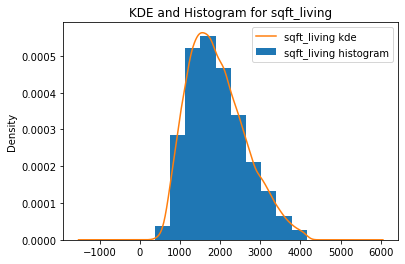

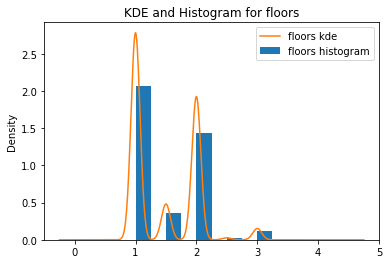

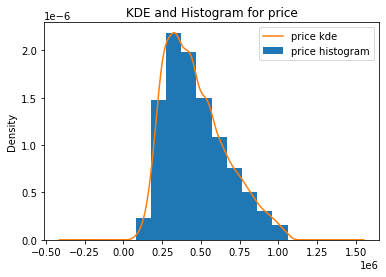

In [80]:
def plotNormality(df, column):
    df[column].plot.hist(title='KDE and Histogram for ' + column,
                         density=True,
                         label=column + ' histogram')
    df[column].plot.kde(label=column + ' kde')
    plt.legend()
    plt.show()


numerical_features = ['sqft_living', 'floors', 'price']
for column in numerical_features:
    plotNormality(df, column)

### Dropping irrelevant columns

In [81]:
df = df.drop(columns=[
    'id', 'lat', 'long', 'sqft_above', 'waterfront', 'date', 'view',
    'sqft_basement', 'yr_built', 'sqft_lot', 'yr_renovated', 'zipcode',
    'sqft_living15', 'sqft_lot15'
])
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade
0,221900.0,3,1.00,1180,1.0,Average,7 Average
1,538000.0,3,2.25,2570,2.0,Average,7 Average
2,180000.0,2,1.00,770,1.0,Average,6 Low Average
3,604000.0,4,3.00,1960,1.0,Very Good,7 Average
4,510000.0,3,2.00,1680,1.0,Average,8 Good


### Checking for missing values 

In [82]:
df.isna().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
floors         0
condition      0
grade          0
dtype: int64

Checking how many results left after cleaning 

In [83]:
df.shape

(19794, 7)

### Checking for multicollinearity 

Does Multicollinearity exists between the house features?

<AxesSubplot:>

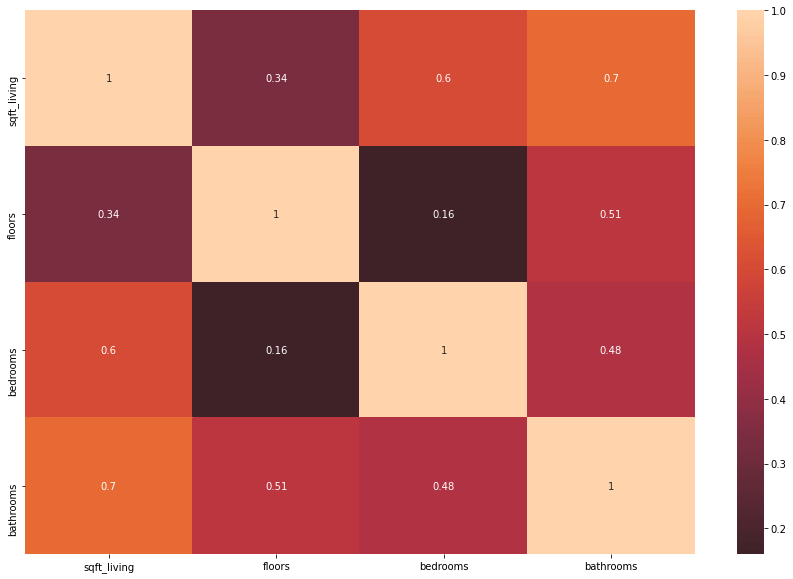

In [84]:
feats = ['sqft_living', 'floors','bedrooms','bathrooms','grade','condition']
corr = df[feats].corr()

_, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, center=0, annot=True, ax=ax)

Keeping all features that are below .75 on the multicollinearity scale. Bathrooms and sqft living has significant correlation as well as sqft living and bedrooms. 

In [85]:
#Saved cleaned data
df.to_csv("data/kc_house_data_cleaned.csv", index=False)

## Preprocessing 

 ### One Hot Encoding

One hot encoding the chosen categorical variables. 

In [86]:
cnd_dummy = pd.get_dummies(df['condition'], prefix='cnd', drop_first=True)
grp_dummy = pd.get_dummies(df['grade'], prefix='grd', drop_first=True)

fl_dummy = pd.get_dummies(df['floors'], prefix='fl', drop_first=True)

bed_dummy = pd.get_dummies(df['bedrooms'], prefix='bed', drop_first=True)

bath_dummy = pd.get_dummies(df['bathrooms'], prefix='bath', drop_first=True)

In [87]:
df = df.drop(['condition', 'grade', 'floors', 'bedrooms', 'bathrooms'], axis=1)

In [88]:
df_final = pd.concat(
    [df, cnd_dummy, grp_dummy, fl_dummy, bed_dummy, bath_dummy], axis=1)
df_final.head()

,price,sqft_living,cnd_Fair,cnd_Good,cnd_Poor,cnd_Very Good,grd_11 Excellent,grd_12 Luxury,grd_3 Poor,grd_4 Low,...,bath_1.5,bath_1.75,bath_2.0,bath_2.25,bath_2.5,bath_2.75,bath_3.0,bath_3.25,bath_3.5,bath_3.75
0,221900.0,1180,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,2570,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,180000.0,770,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,1960,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,510000.0,1680,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Formatting column names for syntax purposes  

In [89]:
df_final.columns = df_final.columns.str.replace('.', '_')
df_final.columns = df_final.columns.str.replace(' ', '_')
df_final.columns = df_final.columns.str.replace('-', '_')

## Modeling 

### Fitting the Initial Model 

In [90]:
outcome = 'price'
predictor_cols = df_final.columns.tolist()
predictor_cols.remove('price')

In [91]:
df_final.describe()

,price,sqft_living,cnd_Fair,cnd_Good,cnd_Poor,cnd_Very_Good,grd_11_Excellent,grd_12_Luxury,grd_3_Poor,grd_4_Low,...,bath_1_5,bath_1_75,bath_2_0,bath_2_25,bath_2_5,bath_2_75,bath_3_0,bath_3_25,bath_3_5,bath_3_75
count,1.979400e+04,19794.000000,19794.000000,19794.000000,19794.000000,19794.000000,19794.000000,19794.000000,19794.000000,19794.000000,...,19794.000000,19794.000000,19794.000000,19794.000000,19794.000000,19794.000000,19794.000000,19794.000000,19794.000000,19794.000000
mean,4.667919e+05,1925.425735,0.008285,0.265889,0.001364,0.076134,0.004042,0.000051,0.000051,0.001364,...,0.071789,0.151308,0.094928,0.097353,0.258311,0.052895,0.029807,0.018743,0.023795,0.002829
std,1.982094e+05,712.942248,0.090648,0.441816,0.036909,0.265219,0.063447,0.007108,0.007108,0.036909,...,0.258145,0.358358,0.293123,0.296445,0.437717,0.223829,0.170059,0.135620,0.152414,0.053116
min,7.800000e+04,370.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.120000e+05,1380.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.300000e+05,1830.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.898000e+05,2380.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.060000e+06,4160.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Importing statsmodel OLS for modeling 

In [92]:
from statsmodels.formula.api import ols

In [93]:
predictors = '+'.join(predictor_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     527.1
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:24:20   Log-Likelihood:            -2.6285e+05
No. Observations:               19794   AIC:                         5.258e+05
Df Residuals:                   19757   BIC:                         5.261e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          4.295e+05   7.19e+04      5.972      0.000    2.89e+05     5.7e+05
sqft_living         107.9077      2.635     40.957      0.000     102.744     113.072
cnd_Fair          -3.043e+04   1.13e+04     -2.704      0.007   -5.25e+04   -8376.309
cnd_Good           3.175e+04   2472.689     12.841      0.000    2.69e+04    3.66e+04
cnd_Poor           2396.0471   2.75e+04      0.087      0.931   -5.16e+04    5.64e+04
cnd_Very_Good      8.335e+04   4009.249     20.789      0.000    7.55e+04    9.12e+04
grd_11_Excellent   5.147e+04   1.68e+04      3.058      0.002    1.85e+04    8.45e+04
grd_12_Luxury      1.141e+05   1.42e+05      0.803      0.422   -1.64e+05    3.92e+05
grd_3_Poor        -4.122e+05   1.43e+05     -2.877      0.004   -6.93e+05   -1.31e+05
grd_4_Low         -3.997e+05   2.98e+04    -13.406      0.000   -4.58e+05   -3.41e+05
grd_5_Fair        -3.892e+05    1.2e+04    -32.384      0.000   -4.13e+05   -3.66e+05
grd_6_Low_Average -3.467e+05   7894.225    -43.924      0.000   -3.62e+05   -3.31e+05
grd_7_Average     -2.685e+05   6822.186    -39.361      0.000   -2.82e+05   -2.55e+05
grd_8_Good        -1.767e+05   6421.106    -27.513      0.000   -1.89e+05   -1.64e+05
grd_9_Better      -7.206e+04   6483.055    -11.116      0.000   -8.48e+04   -5.94e+04
fl_1_5             8.095e+04   3710.170     21.819      0.000    7.37e+04    8.82e+04
fl_2_0            -1.129e+04   2991.277     -3.775      0.000   -1.72e+04   -5428.730
fl_2_5             4.943e+04   1.45e+04      3.415      0.001    2.11e+04    7.78e+04
fl_3_0              4.36e+04   6683.776      6.523      0.000    3.05e+04    5.67e+04
fl_3_5              5.67e+04    5.8e+04      0.978      0.328    -5.7e+04     1.7e+05
bed_2             -1229.7569   1.09e+04     -0.113      0.910   -2.26e+04    2.02e+04
bed_3             -5.387e+04   1.09e+04     -4.934      0.000   -7.53e+04   -3.25e+04
bed_4              -6.02e+04   1.12e+04     -5.386      0.000   -8.21e+04   -3.83e+04
bed_5             -7.173e+04   1.19e+04     -6.014      0.000   -9.51e+04   -4.83e+04
bath_0_75          1.052e+05   7.31e+04      1.441      0.150    -3.8e+04    2.48e+05
bath_1_0            9.15e+04    7.1e+04      1.290      0.197   -4.76e+04    2.31e+05
bath_1_25          5.354e+04   8.89e+04      0.602      0.547   -1.21e+05    2.28e+05
bath_1_5           7.747e+04   7.11e+04      1.090      0.276   -6.18e+04    2.17e+05
bath_1_75          8.956e+04    7.1e+04      1.261      0.207   -4.96e+04    2.29e+05
bath_2_0           8.784e+04    7.1e+04      1.237      0.216   -5.14e+04    2.27e+05
bath_2_25          7.464e+04   7.11e+04      1.050      0.294   -6.46e+04    2.14e+05
bath_2_5           5.493e+04    7.1e+04      0.773      0.439   -8.43e+04    1.94e+05
bath_2_75          8.657e+04   7.11e+04      1.217      0.224   -5.29e+04

### Initial Refinement 

From the model above we can see that we have some predictor columns with P values greater than 0.05. Below we will write a function to remove these from our predictor columns.

In [94]:
# Removing P values greater than 0.05
def removingHighPValues(columns):
    for col in df_final.columns.tolist():
        if col in columns and col in predictor_cols and model.pvalues[
                col] >= 0.05:
            columns.remove(col)


removingHighPValues(predictor_cols)
predictor_cols

['sqft_living',
 'cnd_Fair',
 'cnd_Good',
 'cnd_Very_Good',
 'grd_11_Excellent',
 'grd_3_Poor',
 'grd_4_Low',
 'grd_5_Fair',
 'grd_6_Low_Average',
 'grd_7_Average',
 'grd_8_Good',
 'grd_9_Better',
 'fl_1_5',
 'fl_2_0',
 'fl_2_5',
 'fl_3_0',
 'bed_3',
 'bed_4',
 'bed_5']

Now let us refit our model with new predictor columns

In [95]:
#Model fit with removed p values greater than 0.05
outcome = 'price'
predictors = '+'.join(predictor_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     979.2
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:24:24   Log-Likelihood:            -2.6295e+05
No. Observations:               19794   AIC:                         5.259e+05
Df Residuals:                   19774   BIC:                         5.261e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.214e+05   9017.716     57.816      0.000    5.04e+05    5.39e+05
sqft_living         106.9419      2.430     44.001      0.000     102.178     111.706
cnd_Fair          -2.872e+04   1.13e+04     -2.542      0.011   -5.09e+04   -6570.708
cnd_Good           3.252e+04   2465.397     13.192      0.000    2.77e+04    3.74e+04
cnd_Very_Good      8.495e+04   4007.256     21.199      0.000    7.71e+04    9.28e+04
grd_11_Excellent   5.853e+04   1.69e+04      3.465      0.001    2.54e+04    9.16e+04
grd_3_Poor        -3.999e+05   1.43e+05     -2.804      0.005    -6.8e+05    -1.2e+05
grd_4_Low         -3.939e+05   2.86e+04    -13.785      0.000    -4.5e+05   -3.38e+05
grd_5_Fair        -3.893e+05   1.19e+04    -32.674      0.000   -4.13e+05   -3.66e+05
grd_6_Low_Average -3.472e+05   7889.104    -44.005      0.000   -3.63e+05   -3.32e+05
grd_7_Average     -2.729e+05   6811.211    -40.066      0.000   -2.86e+05    -2.6e+05
grd_8_Good        -1.843e+05   6376.101    -28.898      0.000   -1.97e+05   -1.72e+05
grd_9_Better      -7.766e+04   6481.686    -11.981      0.000   -9.04e+04    -6.5e+04
fl_1_5             8.198e+04   3699.094     22.163      0.000    7.47e+04    8.92e+04
fl_2_0            -2.278e+04   2671.736     -8.528      0.000    -2.8e+04   -1.75e+04
fl_2_5              4.83e+04   1.45e+04      3.336      0.001    1.99e+04    7.67e+04
fl_3_0             3.667e+04   6487.686      5.652      0.000     2.4e+04    4.94e+04
bed_3             -5.644e+04   3278.239    -17.217      0.000   -6.29e+04      -5e+04
bed_4              -6.43e+04   3943.381    -16.306      0.000    -7.2e+04   -5.66e+04
bed_5             -6.856e+04   5676.965    -12.077      0.000   -7.97e+04   -5.74e+04
==============================================================================
Omnibus:                      987.043   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1219.271
Skew:                           0.520   Prob(JB):                    1.73e-265
Kurtosis:                       3.630   Cond. No.                     2.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking for Multicollinearity in Initial model 

The initial model indicates that their is still a strong multicollinearity issue even though we checked for multicollinearity before modeling. Hopefully with further refinements the model will showcase less multicollinearity and more improvement. After the refinement removal of high p values over 0.05 the R-squared dropped from 0.490 to 0.485.Now checking to see if it meets further assumptions.

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
#Created a function for checking and removing variance less than 10
def removeHighVariancePreditors(df, predictor_cols):
    # Create tempory data frame that contains predictor columns
    temp_df = df[predictor_cols]

    # Calculating variance inflation factor for each predictor column
    vif = []
    cols_with_high_var = []
    for col_idx in range(temp_df.shape[1]):
        vif.append(variance_inflation_factor(temp_df.values, col_idx))

    # Removing columns that contain high variance inflation factors
    new_predictor_cols = []
    for col, val in list(zip(predictor_cols, vif)):
        if val < 15:
            new_predictor_cols.append(col)
        else:
            cols_with_high_var.append(col)
    # Returns all predictors columns with variance inflation factors less than
    # 15
    return new_predictor_cols

In [98]:
# Removing columns with high variance
predictor_cols = removeHighVariancePreditors(df_final,
                                             predictor_cols)
predictor_cols

['sqft_living',
 'cnd_Fair',
 'cnd_Good',
 'cnd_Very_Good',
 'grd_11_Excellent',
 'grd_3_Poor',
 'grd_4_Low',
 'grd_5_Fair',
 'grd_6_Low_Average',
 'grd_7_Average',
 'grd_8_Good',
 'grd_9_Better',
 'fl_1_5',
 'fl_2_0',
 'fl_2_5',
 'fl_3_0',
 'bed_3',
 'bed_4',
 'bed_5']

In [99]:
outcome = 'price'
predictors = '+'.join(predictor_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     979.2
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:24:29   Log-Likelihood:            -2.6295e+05
No. Observations:               19794   AIC:                         5.259e+05
Df Residuals:                   19774   BIC:                         5.261e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.214e+05   9017.716     57.816      0.000    5.04e+05    5.39e+05
sqft_living         106.9419      2.430     44.001      0.000     102.178     111.706
cnd_Fair          -2.872e+04   1.13e+04     -2.542      0.011   -5.09e+04   -6570.708
cnd_Good           3.252e+04   2465.397     13.192      0.000    2.77e+04    3.74e+04
cnd_Very_Good      8.495e+04   4007.256     21.199      0.000    7.71e+04    9.28e+04
grd_11_Excellent   5.853e+04   1.69e+04      3.465      0.001    2.54e+04    9.16e+04
grd_3_Poor        -3.999e+05   1.43e+05     -2.804      0.005    -6.8e+05    -1.2e+05
grd_4_Low         -3.939e+05   2.86e+04    -13.785      0.000    -4.5e+05   -3.38e+05
grd_5_Fair        -3.893e+05   1.19e+04    -32.674      0.000   -4.13e+05   -3.66e+05
grd_6_Low_Average -3.472e+05   7889.104    -44.005      0.000   -3.63e+05   -3.32e+05
grd_7_Average     -2.729e+05   6811.211    -40.066      0.000   -2.86e+05    -2.6e+05
grd_8_Good        -1.843e+05   6376.101    -28.898      0.000   -1.97e+05   -1.72e+05
grd_9_Better      -7.766e+04   6481.686    -11.981      0.000   -9.04e+04    -6.5e+04
fl_1_5             8.198e+04   3699.094     22.163      0.000    7.47e+04    8.92e+04
fl_2_0            -2.278e+04   2671.736     -8.528      0.000    -2.8e+04   -1.75e+04
fl_2_5              4.83e+04   1.45e+04      3.336      0.001    1.99e+04    7.67e+04
fl_3_0             3.667e+04   6487.686      5.652      0.000     2.4e+04    4.94e+04
bed_3             -5.644e+04   3278.239    -17.217      0.000   -6.29e+04      -5e+04
bed_4              -6.43e+04   3943.381    -16.306      0.000    -7.2e+04   -5.66e+04
bed_5             -6.856e+04   5676.965    -12.077      0.000   -7.97e+04   -5.74e+04
==============================================================================
Omnibus:                      987.043   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1219.271
Skew:                           0.520   Prob(JB):                    1.73e-265
Kurtosis:                       3.630   Cond. No.                     2.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
new_predictor_cols = removeHighVariancePreditors(df_final, predictor_cols)
print("New predictor cols", new_predictor_cols)

New predictor cols ['sqft_living', 'cnd_Fair', 'cnd_Good', 'cnd_Very_Good', 'grd_11_Excellent', 'grd_3_Poor', 'grd_4_Low', 'grd_5_Fair', 'grd_6_Low_Average', 'grd_7_Average', 'grd_8_Good', 'grd_9_Better', 'fl_1_5', 'fl_2_0', 'fl_2_5', 'fl_3_0', 'bed_3', 'bed_4', 'bed_5']


In [101]:
outcome = 'price'
predictors = '+'.join(predictor_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     979.2
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:24:30   Log-Likelihood:            -2.6295e+05
No. Observations:               19794   AIC:                         5.259e+05
Df Residuals:                   19774   BIC:                         5.261e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.214e+05   9017.716     57.816      0.000    5.04e+05    5.39e+05
sqft_living         106.9419      2.430     44.001      0.000     102.178     111.706
cnd_Fair          -2.872e+04   1.13e+04     -2.542      0.011   -5.09e+04   -6570.708
cnd_Good           3.252e+04   2465.397     13.192      0.000    2.77e+04    3.74e+04
cnd_Very_Good      8.495e+04   4007.256     21.199      0.000    7.71e+04    9.28e+04
grd_11_Excellent   5.853e+04   1.69e+04      3.465      0.001    2.54e+04    9.16e+04
grd_3_Poor        -3.999e+05   1.43e+05     -2.804      0.005    -6.8e+05    -1.2e+05
grd_4_Low         -3.939e+05   2.86e+04    -13.785      0.000    -4.5e+05   -3.38e+05
grd_5_Fair        -3.893e+05   1.19e+04    -32.674      0.000   -4.13e+05   -3.66e+05
grd_6_Low_Average -3.472e+05   7889.104    -44.005      0.000   -3.63e+05   -3.32e+05
grd_7_Average     -2.729e+05   6811.211    -40.066      0.000   -2.86e+05    -2.6e+05
grd_8_Good        -1.843e+05   6376.101    -28.898      0.000   -1.97e+05   -1.72e+05
grd_9_Better      -7.766e+04   6481.686    -11.981      0.000   -9.04e+04    -6.5e+04
fl_1_5             8.198e+04   3699.094     22.163      0.000    7.47e+04    8.92e+04
fl_2_0            -2.278e+04   2671.736     -8.528      0.000    -2.8e+04   -1.75e+04
fl_2_5              4.83e+04   1.45e+04      3.336      0.001    1.99e+04    7.67e+04
fl_3_0             3.667e+04   6487.686      5.652      0.000     2.4e+04    4.94e+04
bed_3             -5.644e+04   3278.239    -17.217      0.000   -6.29e+04      -5e+04
bed_4              -6.43e+04   3943.381    -16.306      0.000    -7.2e+04   -5.66e+04
bed_5             -6.856e+04   5676.965    -12.077      0.000   -7.97e+04   -5.74e+04
==============================================================================
Omnibus:                      987.043   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1219.271
Skew:                           0.520   Prob(JB):                    1.73e-265
Kurtosis:                       3.630   Cond. No.                     2.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Check for Normality 

Checking to ensure that our residuals are normally distributed.

In [102]:
import statsmodels.api as sm
import scipy.stats as stats

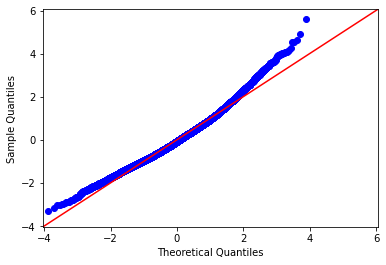

In [103]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Checking for Homoscedasticity 

Checking that errors do not display heteroscedasticity

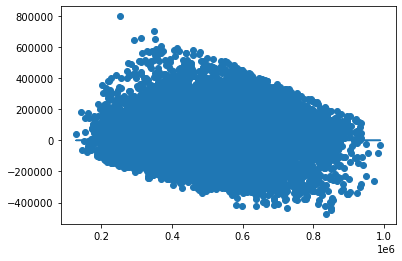

In [104]:
plt.scatter(model.predict(df_final[predictor_cols]), model.resid)
plt.plot(model.predict(df_final[predictor_cols]),
         [0 for i in range(len(df_final))])

## Model Refinement 3 

### Refining

Large errors above 875000, so I removed these outliers, and began retraining the model. 

In [105]:
#Finding a cutoff point
for i in range(90, 99):
    q = i / 100
    print('{} percentile:{}'.format(q, df_final['price'].quantile(q=q)))

0.9 percentile:760000.0
0.91 percentile:775000.0
0.92 percentile:791500.0
0.93 percentile:810000.0
0.94 percentile:830000.0
0.95 percentile:850000.0
0.96 percentile:876887.999999999
0.97 percentile:910000.0
0.98 percentile:947569.9999999998


In [106]:
subset = df_final[df_final['price'] < 875000]
print('Percent removed:', (len(df_final) - len(subset)) / len(df_final))
outcome = 'price'
predictors = '+'.join(predictor_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=subset).fit()
model.summary()

Percent removed: 0.04188137819541275


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     782.6
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:24:36   Log-Likelihood:            -2.5027e+05
No. Observations:               18965   AIC:                         5.006e+05
Df Residuals:                   18945   BIC:                         5.007e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           4.96e+05   8975.596     55.263      0.000    4.78e+05    5.14e+05
sqft_living          94.3941      2.319     40.712      0.000      89.849      98.939
cnd_Fair          -3.492e+04   1.04e+04     -3.353      0.001   -5.53e+04   -1.45e+04
cnd_Good           2.561e+04   2305.760     11.105      0.000    2.11e+04    3.01e+04
cnd_Very_Good      7.131e+04   3789.035     18.821      0.000    6.39e+04    7.87e+04
grd_11_Excellent   1.292e+04   2.39e+04      0.542      0.588   -3.39e+04    5.97e+04
grd_3_Poor        -3.544e+05   1.31e+05     -2.712      0.007   -6.11e+05   -9.83e+04
grd_4_Low         -3.563e+05   2.64e+04    -13.499      0.000   -4.08e+05   -3.05e+05
grd_5_Fair        -3.477e+05   1.14e+04    -30.423      0.000    -3.7e+05   -3.25e+05
grd_6_Low_Average -3.067e+05   7978.886    -38.437      0.000   -3.22e+05   -2.91e+05
grd_7_Average     -2.301e+05   7081.470    -32.498      0.000   -2.44e+05   -2.16e+05
grd_8_Good        -1.491e+05   6735.169    -22.139      0.000   -1.62e+05   -1.36e+05
grd_9_Better        -6.1e+04   6902.501     -8.837      0.000   -7.45e+04   -4.75e+04
fl_1_5             7.678e+04   3469.884     22.127      0.000       7e+04    8.36e+04
fl_2_0            -1.923e+04   2502.714     -7.685      0.000   -2.41e+04   -1.43e+04
fl_2_5             4.403e+04   1.42e+04      3.099      0.002    1.62e+04    7.19e+04
fl_3_0             3.442e+04   6078.457      5.663      0.000    2.25e+04    4.63e+04
bed_3             -5.277e+04   3026.799    -17.434      0.000   -5.87e+04   -4.68e+04
bed_4             -5.985e+04   3672.967    -16.296      0.000   -6.71e+04   -5.27e+04
bed_5              -6.47e+04   5371.550    -12.045      0.000   -7.52e+04   -5.42e+04
==============================================================================
Omnibus:                      384.590   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              408.117
Skew:                           0.359   Prob(JB):                     2.39e-89
Kurtosis:                       3.022   Cond. No.                     2.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Model 3 has a R-squared of 0.440 making it the model that accounts for 44% of the variation between price and the features of a home. While this model still has high multicollinearity it has been reduced overall. Due to this I have chosen this model to draw final conclusions from.

### Rechecking Normality 

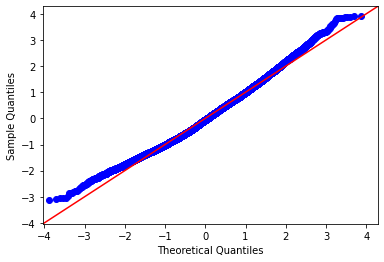

In [107]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Rechecking Homoscedasticity

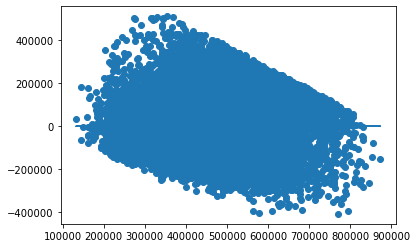

In [108]:
plt.scatter(model.predict(subset[predictor_cols]), model.resid)
plt.plot(model.predict(subset[predictor_cols]),
         [0 for i in range(len(subset))])

## Model Refinement 4

Due to the errors at the beginning, I decided to remove some of the outliers in the initial price. 

In [109]:
#Finding a beginning point
for i in range(45, 50):
    q = i / 100
    print('{} percentile:{}'.format(q, df_final['price'].quantile(q=q)))

0.45 percentile:405000.0
0.46 percentile:411000.0
0.47 percentile:417000.0
0.48 percentile:421819.9999999997
0.49 percentile:425000.0


In [110]:
subset_2 = subset[subset['price'] >= 420000]
print('Percent removed:', (len(subset) - len(subset_2)) / len(subset))
outcome = 'price'
predictors = '+'.join(predictor_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=subset_2).fit()
model.summary()

Percent removed: 0.4952807803849196


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     206.3
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:24:41   Log-Likelihood:            -1.2409e+05
No. Observations:                9572   AIC:                         2.482e+05
Df Residuals:                    9553   BIC:                         2.484e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.981e+05   8564.925     69.833      0.000    5.81e+05    6.15e+05
sqft_living          48.1793      2.397     20.097      0.000      43.480      52.879
cnd_Fair          -6612.4753   1.84e+04     -0.359      0.720   -4.27e+04    2.95e+04
cnd_Good           2.787e+04   2640.352     10.556      0.000    2.27e+04     3.3e+04
cnd_Very_Good      5.452e+04   4059.675     13.431      0.000    4.66e+04    6.25e+04
grd_11_Excellent   2.063e+04   1.89e+04      1.089      0.276   -1.65e+04    5.77e+04
grd_3_Poor        -3.761e-11   6.55e-11     -0.574      0.566   -1.66e-10    9.07e-11
grd_4_Low         -1.992e+05   1.04e+05     -1.923      0.055   -4.02e+05    3897.247
grd_5_Fair        -1.235e+05   2.47e+04     -4.991      0.000   -1.72e+05    -7.5e+04
grd_6_Low_Average  -1.81e+05   8850.646    -20.449      0.000   -1.98e+05   -1.64e+05
grd_7_Average      -1.53e+05   6141.551    -24.911      0.000   -1.65e+05   -1.41e+05
grd_8_Good        -1.132e+05   5611.935    -20.179      0.000   -1.24e+05   -1.02e+05
grd_9_Better      -5.295e+04   5590.541     -9.472      0.000   -6.39e+04    -4.2e+04
fl_1_5             4.702e+04   3633.151     12.943      0.000    3.99e+04    5.41e+04
fl_2_0            -1.026e+04   2767.019     -3.709      0.000   -1.57e+04   -4838.875
fl_2_5             1.897e+04   1.25e+04      1.522      0.128   -5461.908    4.34e+04
fl_3_0             2495.1142   6210.655      0.402      0.688   -9679.089    1.47e+04
bed_3             -1.912e+04   3748.352     -5.102      0.000   -2.65e+04   -1.18e+04
bed_4             -1.482e+04   4223.286     -3.509      0.000   -2.31e+04   -6538.884
bed_5             -2.014e+04   5646.464     -3.567      0.000   -3.12e+04   -9073.937
==============================================================================
Omnibus:                      203.881   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.823
Skew:                           0.368   Prob(JB):                     8.27e-48
Kurtosis:                       2.964   Cond. No.                     2.48e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.07e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Model 4 is still showcasing high levels of multicolinearity as well as a low R-squared value of 0.280.Due to that I chose not to use this model as the final model to draw conclusions from. Instead I will be using model 3 due to its higher R-squared value of 0.440.  

### Last Check Normality

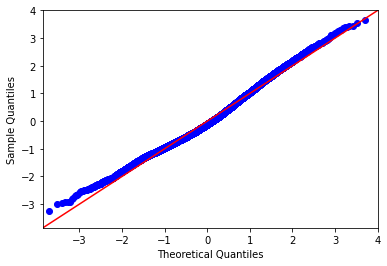

In [111]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Last Check Homoscedasticity

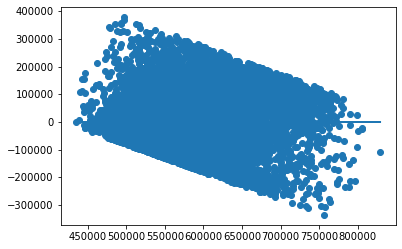

In [112]:
plt.scatter(model.predict(subset_2[predictor_cols]), model.resid)
plt.plot(model.predict(subset_2[predictor_cols]),
         [0 for i in range(len(subset_2))])

## Regression Results 

 Model 3 has a R-squared of 0.440 making it the most accountable.The relationship between price and the various aspects of a house explains 44% of the variation in the data

***Coefficients***
- The target price per a sqft living is 94 dollars. 
For every additional sqft of a home the price will increase on average by $94

- Through out the various levels of a home two story homes degraded the price of a home by 19,000. While 2.5 story homes increase the price by 44,000.Lofts being the ideal by bringing up the price to 76,000.

- The condition of the home influence the price greatly.With the condition of fair bringing down the home value by 35,000 while the condition status of good increases the home value by 25,000. The ideal condition status for homes value is very good increasing the price by 70,000. 

Draw Backs:

-This model lacks in depth information about bathrooms and bedrooms with bedrooms 3 and 4 both being being negative. 

- Grading status of excellent has a high p_value of 0.588 showcasing that it lacks association with price. Considering this information do not take it into account for home buying/flipping.

Please note that these relationships are only valid within this data range. 


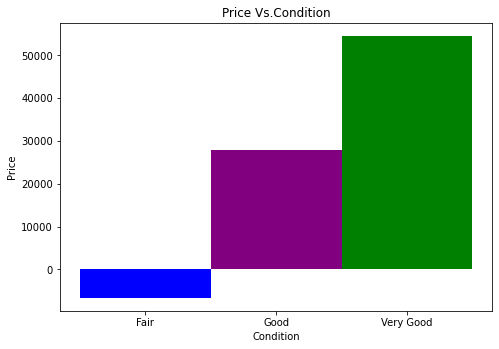

In [113]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

conditions = ['Fair', 'Good', 'Very Good']

coef = [
    model.params['cnd_Fair'], model.params['cnd_Good'],
    model.params['cnd_Very_Good']
]
ax.bar(conditions,
       coef,
       width=1.0,
       color=['blue', 'purple', 'green'])
ax.set_title("Price Vs.Condition")
ax.set_xlabel('Condition')
ax.set_ylabel("Price")
plt.show()

Condition Status: 
 - Fair, Brings down home value by 35,000
 - Good, Increases home value by 25,000
 - Very good Increases home value by 70,000


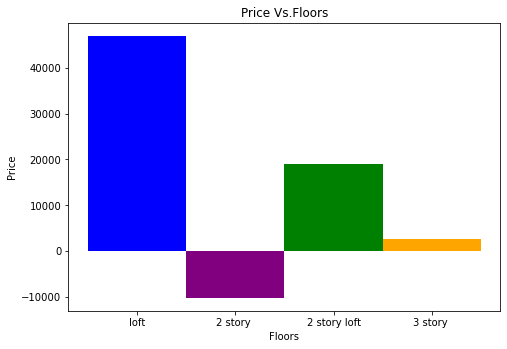

In [114]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

conditions = ['loft', '2 story ','2 story loft', '3 story ']

coef = [
    model.params['fl_1_5'], model.params['fl_2_0'],
    model.params['fl_2_5'],model.params['fl_3_0']
]
ax.bar(conditions,
       coef,
       width=1.0,
       color=['blue', 'purple', 'green', 'orange'])
ax.set_title("Price Vs.Floors")
ax.set_xlabel('Floors')
ax.set_ylabel("Price")
plt.show()

Floors on a home price range on average: 

-Lofts increase home price  by $77,000

-2 Story decrease home price  by $20,000

-2 Story Lofts increase home price  by  $44,000

-3 Story increase home price  by  $34,000


## Conclusion


After doing the analysis, the three recommendations for Hello Homes Building Expansion,based on Model 3:

- Target price per a sqft at $94

- Focus on building more lofts, townhouses and three stories homes since they are the most profitable. Avoid regular two story homes and instead aim for lofts which is the best increasing the price of home by 77,000. 

- While all houses flipped/made will also need to meet the condition good to ensure the price value increases by 25,000.


## Next Steps 

Attributes for Hello Homes to consider for further analysis, based on Model 3: 

Limitations :The model is on the weaker side with a R-squared value of 0.440, preferable we would have a model with a higher R-squared conveying a large percentage of accountability for price vs the various aspects of a home.

Limited Data: Bedrooms is negative in model 3 as well as lacking options in their respective groups to draw conclusions from. Expand the predictor variables to have more aspects of a home to mix and match for future properties.  
 